<a href="https://colab.research.google.com/github/Yospy/Bitcoin-Price-Prediction-using-RNN-and-LSTM/blob/main/Bitcoin_Price_Prediction_using_RNN%2CLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('BTC-USD.csv')
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-02,10624.390625,10662.813477,10440.311523,10585.164063,10585.164063,2.312784e+10
1,2020-10-03,10583.806641,10614.091797,10527.978516,10565.493164,10565.493164,1.709401e+10
2,2020-10-04,10567.919922,10700.791016,10531.342773,10684.428711,10684.428711,1.754679e+10
3,2020-10-05,10688.034180,10804.000977,10646.443359,10804.000977,10804.000977,1.938519e+10
4,2020-10-06,10799.778320,10803.456055,10565.197266,10621.664063,10621.664063,2.226496e+10


In [3]:
price = df[['Close']]

In [4]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   363 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [6]:
price = price.dropna()

In [7]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 365
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   363 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


Text(0, 0.5, 'Price')

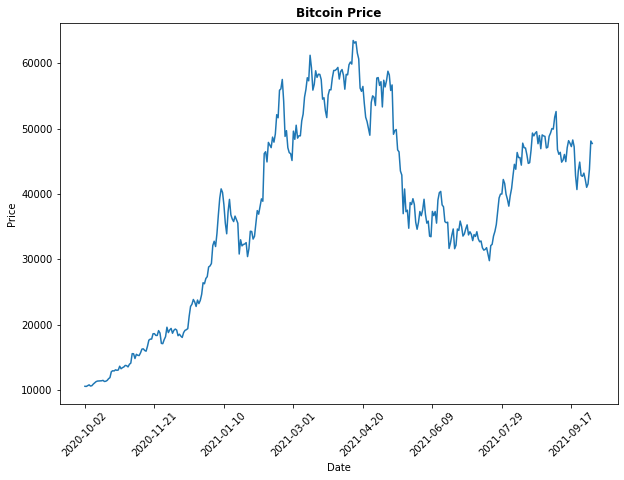

In [8]:
plt.figure(figsize=(10,7))
plt.plot(price)
plt.xticks(range(0,df.shape[0],50),df['Date'].iloc[::50],rotation=45)
plt.title("Bitcoin Price",fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price')

In [9]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [10]:
norm_data = min_max_scaler.fit_transform(price)

In [11]:
norm_data

array([[3.71583974e-04],
       [0.00000000e+00],
       [2.24669667e-03],
       [4.50542098e-03],
       [1.06107026e-03],
       [2.14673075e-03],
       [6.76517833e-03],
       [1.38061253e-02],
       [1.54650541e-02],
       [1.63212487e-02],
       [1.75650210e-02],
       [1.42927651e-02],
       [1.49724005e-02],
       [1.73385250e-02],
       [2.22249565e-02],
       [2.55174491e-02],
       [4.26574074e-02],
       [4.53436109e-02],
       [4.46946903e-02],
       [4.80292242e-02],
       [4.65767945e-02],
       [4.74093580e-02],
       [5.83461350e-02],
       [5.11125059e-02],
       [5.42595415e-02],
       [5.63117483e-02],
       [6.07409450e-02],
       [5.99119418e-02],
       [5.63866812e-02],
       [6.39391350e-02],
       [6.74036855e-02],
       [9.47213512e-02],
       [9.44574995e-02],
       [8.06275956e-02],
       [9.28270349e-02],
       [9.00454403e-02],
       [8.92631457e-02],
       [9.70163245e-02],
       [1.07878168e-01],
       [1.08661441e-01],


In [12]:
for i in range(len(price)):
  print(f'Real:{price.values[i]}, Normalised:{norm_data[i]}')

Real:[10585.164063], Normalised:[0.00037158]
Real:[10565.493164], Normalised:[0.]
Real:[10684.428711], Normalised:[0.0022467]
Real:[10804.000977], Normalised:[0.00450542]
Real:[10621.664063], Normalised:[0.00106107]
Real:[10679.136719], Normalised:[0.00214673]
Real:[10923.62793], Normalised:[0.00676518]
Real:[11296.361328], Normalised:[0.01380613]
Real:[11384.181641], Normalised:[0.01546505]
Real:[11429.506836], Normalised:[0.01632125]
Real:[11495.349609], Normalised:[0.01756502]
Real:[11322.123047], Normalised:[0.01429277]
Real:[11358.101563], Normalised:[0.0149724]
Real:[11483.359375], Normalised:[0.01733853]
Real:[11742.037109], Normalised:[0.02222496]
Real:[11916.334961], Normalised:[0.02551745]
Real:[12823.689453], Normalised:[0.04265741]
Real:[12965.891602], Normalised:[0.04534361]
Real:[12931.539063], Normalised:[0.04469469]
Real:[13108.0625], Normalised:[0.04802922]
Real:[13031.173828], Normalised:[0.04657679]
Real:[13075.248047], Normalised:[0.04740936]
Real:[13654.21875], Nor

In [13]:
def univariate_data(dataset,start_index,end_index,history_size,target_size):
    data = []
    labels = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
        
    for i in range(start_index,end_index):
        indices = range(i-history_size,i)
        data.append(reshape(dataset[indices],(history_size,1)))
        labels.append(dataset[i+target_size])
    return array(data),array(labels)

past_history = 5
future_target  = 0

Train_split = int(len(norm_data)*0.8)

x_train,y_train = univariate_data(norm_data,0,Train_split,past_history,future_target)

x_test,y_test = univariate_data(norm_data,Train_split,None,past_history,future_target)



In [15]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64,activation='sigmoid',input_shape=(None,1)),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',loss='mse',metrics=['acc'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x_train,y_train,validation_split=0.1,batch_size=5,epochs=250,shuffle=False)

Epoch 1/250
52/52 [==============================] - 0s 5ms/step - loss: 0.0986 - acc: 0.0039 - val_loss: 0.0605 - val_acc: 0.0000e+00
Epoch 2/250
52/52 [==============================] - 0s 4ms/step - loss: 0.0887 - acc: 0.0039 - val_loss: 0.0503 - val_acc: 0.0000e+00
Epoch 3/250
52/52 [==============================] - 0s 4ms/step - loss: 0.0840 - acc: 0.0039 - val_loss: 0.0413 - val_acc: 0.0000e+00
Epoch 4/250
52/52 [==============================] - 0s 4ms/step - loss: 0.0825 - acc: 0.0039 - val_loss: 0.0513 - val_acc: 0.0000e+00
Epoch 5/250
52/52 [==============================] - 0s 4ms/step - loss: 0.0690 - acc: 0.0039 - val_loss: 0.0338 - val_acc: 0.0000e+00
Epoch 6/250
52/52 [==============================] - 0s 4ms/step - loss: 0.0646 - acc: 0.0000e+00 - val_loss: 0.0428 - val_acc: 0.0000e+00
Epoch 7/250
52/52 [==============================] - 0s 5ms/step - loss: 0.0614 - acc: 0.0039 - val_loss: 0.0308 - val_acc: 0.0000e+00
Epoch 8/250
52/52 [==============================] 

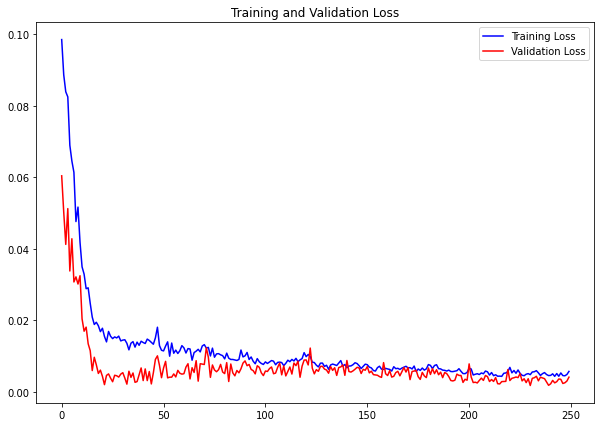

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize=(10,7))

plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot (epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

[]

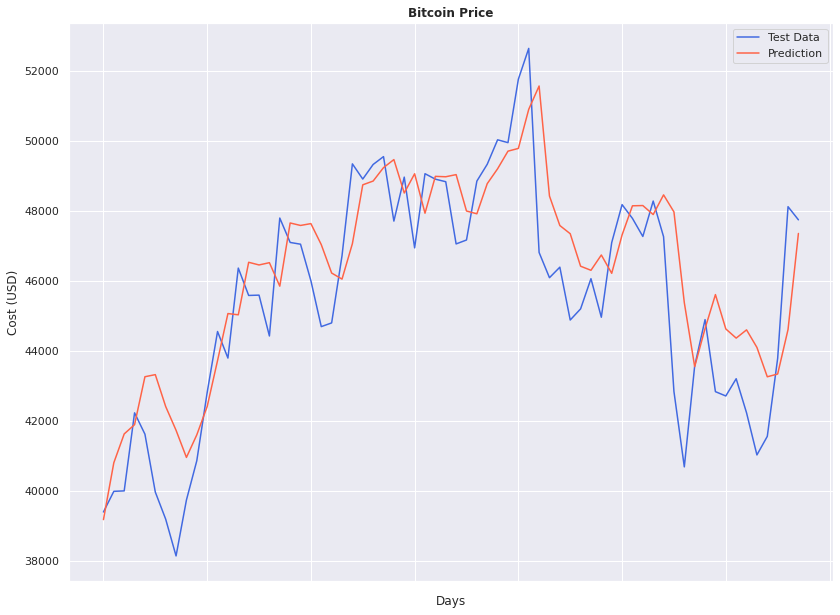

In [21]:
original = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predictions = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))
sn.set(rc = {'figure.figsize':(11.7+2,8.27+2)})
ax = sn.lineplot(x=original.index,y=original[0],label='Test Data',color='royalblue')
ax = sn.lineplot(x=predictions.index,y=predictions[0],label='Prediction',color='tomato')
ax.set_title("Bitcoin Price",fontweight='bold')
ax.set_xlabel("Days")
ax.set_ylabel("Cost (USD)")
ax.set_xticklabels('',size=10)

In [54]:
p = min_max_scaler.inverse_transform(model.predict(x_test))
t = min_max_scaler.inverse_transform(y_test)

In [61]:
for i in range(68):
  print(f' Original: {t[i]}, Predicted: {p[i]} ')

 Original: [39406.941406], Predicted: [39188.58] 
 Original: [39995.90625], Predicted: [40811.582] 
 Original: [40008.421875], Predicted: [41633.664] 
 Original: [42235.546875], Predicted: [41898.44] 
 Original: [41626.195313], Predicted: [43265.65] 
 Original: [39974.894531], Predicted: [43325.727] 
 Original: [39201.945313], Predicted: [42415.55] 
 Original: [38152.980469], Predicted: [41738.133] 
 Original: [39747.503906], Predicted: [40963.047] 
 Original: [40869.554688], Predicted: [41608.25] 
 Original: [42816.5], Predicted: [42415.38] 
 Original: [44555.800781], Predicted: [43726.668] 
 Original: [43798.117188], Predicted: [45067.945] 
 Original: [46365.402344], Predicted: [45032.375] 
 Original: [45585.03125], Predicted: [46530.914] 
 Original: [45593.636719], Predicted: [46454.926] 
 Original: [44428.289063], Predicted: [46519.684] 
 Original: [47793.320313], Predicted: [45849.72] 
 Original: [47096.945313], Predicted: [47652.594] 
 Original: [47047.003906], Predicted: [47581.